# Libraries

In [25]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Plotting Function

In [ ]:
def plotsir(t, S, E, I, R, D):
  f, ax = plt.subplots(1,1,figsize=(10,5))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
  ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
  ax.plot(t, S+E+I+R+D, 'k', alpha=0.7, linewidth=1, label='Total')

  plt.title("L=100")
  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Number of people')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig("Variable_0_L=100.jpg")
  plt.show();

# Derivatives

In [27]:
def deriv(y, t, N, beta, gamma, delta, alpha, rho):
    S, E, I, R, D = y
    dSdt = -beta(t) * S * I / N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    return dSdt, dEdt, dIdt, dRdt, dDdt

# Initial Conditions

In [ ]:
L=100
N = 1000000 # Total no. of people
D = 4.0 # no. of days the infection lasts
gamma = 1.0 / D # recovery rate
delta = 1.0/5.0 #incubation period
def R_0(t): 
    return 5.0 if t < L else 0.9
def beta(t): # no. of people an infected person can infect
    return R_0(t) * gamma 
alpha = 0.1 # death rate
rho = 1/9 # days until death from infection
S0, E0, I0, R0, D0 = N-1 , 1, 0, 0, 0  # initial conditions

# Solving the ODE

In [29]:
t = np.linspace(0, 99, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0 # Initial conditions vector

ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho))
S, E, I, R, D = ret.T

# Plotting

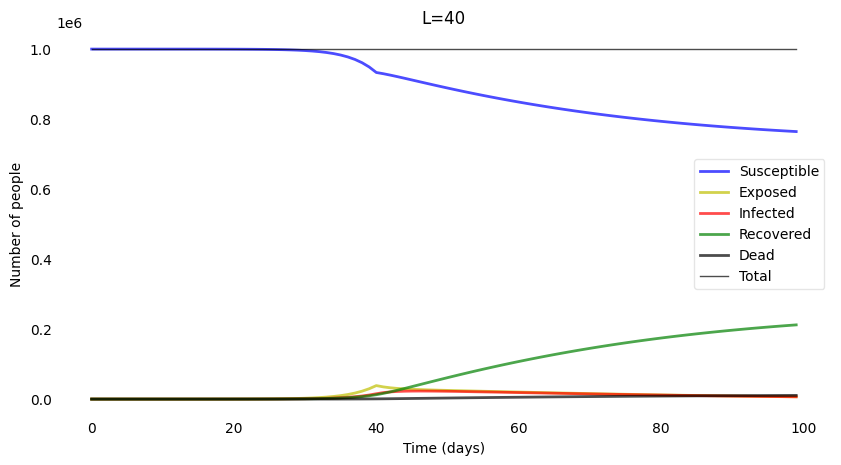

In [30]:
plotsir(t, S, E, I, R, D)